In [28]:
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import os
import gc
import soundfile as sf
from scipy.io.wavfile import write

# Converting mp3 to wav

In [2]:
def mp3_to_wav(filepath,filename,outputpath):
    sound = AudioSegment.from_mp3(filepath / filename)
    outputfilename = filename[:-3] + "wav"
    sound.export(outputpath / outputfilename, format="wav")

In [98]:
filepath = Path('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/')
outputpath =  Path('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/')

# os.chdir('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/AshyPrinia/')
# print(os.getcwd())
for audio in os.listdir(filepath):
    if audio.endswith('.json'):
        continue
    print(f"Converting {audio} to wav")
    mp3_to_wav(filepath,audio,outputpath)

Converting Halcyon107387.mp3 to wav
Converting Halcyon115903.mp3 to wav
Converting Halcyon117091.mp3 to wav
Converting Halcyon120919.mp3 to wav
Converting Halcyon125392.mp3 to wav
Converting Halcyon135397.mp3 to wav
Converting Halcyon145360.mp3 to wav
Converting Halcyon149784.mp3 to wav
Converting Halcyon155920.mp3 to wav
Converting Halcyon156896.mp3 to wav
Converting Halcyon157981.mp3 to wav
Converting Halcyon161223.mp3 to wav
Converting Halcyon162859.mp3 to wav
Converting Halcyon163894.mp3 to wav
Converting Halcyon169565.mp3 to wav
Converting Halcyon174978.mp3 to wav
Converting Halcyon181995.mp3 to wav
Converting Halcyon184706.mp3 to wav
Converting Halcyon187664.mp3 to wav
Converting Halcyon189123.mp3 to wav
Converting Halcyon189204.mp3 to wav
Converting Halcyon196949.mp3 to wav
Converting Halcyon197605.mp3 to wav
Converting Halcyon197737.mp3 to wav
Converting Halcyon19919.mp3 to wav
Converting Halcyon19988.mp3 to wav
Converting Halcyon200266.mp3 to wav
Converting Halcyon207665.mp3 t

# Audio Preprocessing

In signal processing, __sampling__ is the reduction of a continuous signal into a series of discrete values. The sampling frequency or rate is the number of samples taken over some fixed amount of time. A high sampling frequency results in less information loss but higher computational expense, and low sampling frequencies have higher information loss but are fast and cheap to compute.

In [60]:
def removeSilence(signal):
    return signal[librosa.effects.split(signal)[0][0] : librosa.effects.split(signal)[0][-1]]

In [99]:
filepath = Path('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/')
outputpath =  Path('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/')

# os.chdir('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/AshyPrinia/')
# print(os.getcwd())


for wav in os.listdir(filepath):
    if(wav.endswith('.json') or wav.endswith('.mp3')):
        continue
    signal, sample_rate = librosa.load('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/' + wav,sr = None)
    DNsignal = removeSilence(signal)
    print(f"Writing denoised signal wav {wav}")
    write('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/' + 'DN' + wav,  sample_rate,DNsignal)

Writing denoised signal wav Halcyon107387.wav
Writing denoised signal wav Halcyon115903.wav
Writing denoised signal wav Halcyon117091.wav
Writing denoised signal wav Halcyon120919.wav
Writing denoised signal wav Halcyon125392.wav
Writing denoised signal wav Halcyon135397.wav
Writing denoised signal wav Halcyon145360.wav
Writing denoised signal wav Halcyon149784.wav
Writing denoised signal wav Halcyon155920.wav
Writing denoised signal wav Halcyon156896.wav
Writing denoised signal wav Halcyon157981.wav
Writing denoised signal wav Halcyon161223.wav
Writing denoised signal wav Halcyon162859.wav
Writing denoised signal wav Halcyon163894.wav
Writing denoised signal wav Halcyon169565.wav
Writing denoised signal wav Halcyon174978.wav
Writing denoised signal wav Halcyon181995.wav
Writing denoised signal wav Halcyon184706.wav
Writing denoised signal wav Halcyon187664.wav
Writing denoised signal wav Halcyon189123.wav
Writing denoised signal wav Halcyon189204.wav
Writing denoised signal wav Halcyo

Writing denoised signal wav Halcyon614894.wav
Writing denoised signal wav Halcyon614896.wav
Writing denoised signal wav Halcyon615043.wav
Writing denoised signal wav Halcyon615044.wav
Writing denoised signal wav Halcyon615430.wav
Writing denoised signal wav Halcyon615560.wav
Writing denoised signal wav Halcyon615586.wav
Writing denoised signal wav Halcyon616477.wav
Writing denoised signal wav Halcyon616479.wav
Writing denoised signal wav Halcyon616481.wav
Writing denoised signal wav Halcyon616483.wav
Writing denoised signal wav Halcyon620793.wav
Writing denoised signal wav Halcyon621463.wav
Writing denoised signal wav Halcyon621465.wav
Writing denoised signal wav Halcyon621468.wav
Writing denoised signal wav Halcyon633064.wav
Writing denoised signal wav Halcyon633065.wav
Writing denoised signal wav Halcyon633074.wav
Writing denoised signal wav Halcyon633075.wav
Writing denoised signal wav Halcyon637740.wav
Writing denoised signal wav Halcyon646725.wav
Writing denoised signal wav Halcyo

In [80]:
signal, sample_rate = librosa.load('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/AshyPrinia/' + 'Prinia214126.wav',sr = None)
librosa.effects.split(signal)

array([[    512, 1153152]])

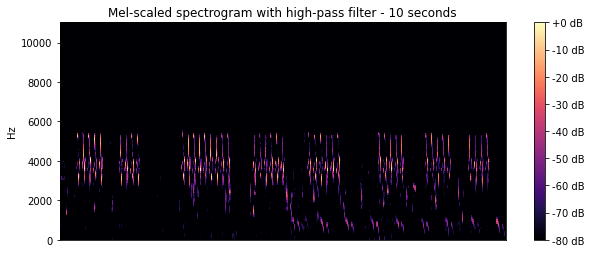

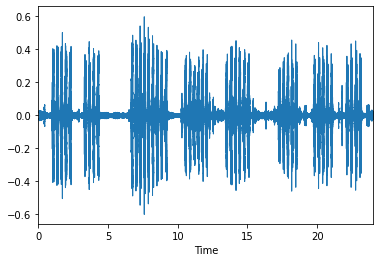

In [81]:
# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sample_rate,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sample_rate/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
plt.show()

plt.figure()
librosa.display.waveplot(signal,sr=sample_rate, x_axis='time')
plt.show()

In [82]:
signal, sample_rate = librosa.load('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/AshyPrinia/' + 'DNPrinia214126.wav',sr = None)

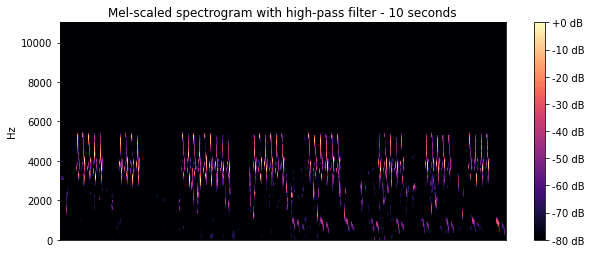

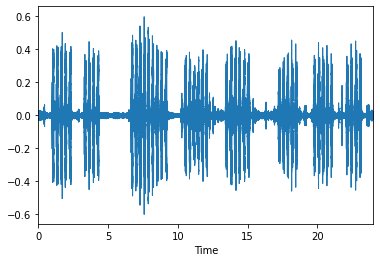

In [83]:
# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sample_rate,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sample_rate/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
plt.show()

plt.figure()
librosa.display.waveplot(signal,sr=sample_rate,x_axis='time')
plt.show()

## Creating chunks

In [64]:
for wav in os.listdir('D:/wavAudio4MFCC/'):
    audio = AudioSegment.from_wav('D:/wavAudio/' + wav)
    create_chunks(audio,wav[:-4])
    print(wav)


    


0.wav
1.wav
10.wav
100.wav
1000.wav
10000.wav
10001.wav
10002.wav
10003.wav
10004.wav
10005.wav
10006.wav
10007.wav
10008.wav
10009.wav
10010.wav
10011.wav
10012.wav
10013.wav
10014.wav
10015.wav
10016.wav
10017.wav
10018.wav
10019.wav
1002.wav
10020.wav
10021.wav
10022.wav
10023.wav
10024.wav
10025.wav
10026.wav
10027.wav
10028.wav
10029.wav
1003.wav
10030.wav
10031.wav
10032.wav
10033.wav
10034.wav
10035.wav
10036.wav
10037.wav
10038.wav
10039.wav
1004.wav
10040.wav
10041.wav
10042.wav
10043.wav
10044.wav
10045.wav
10046.wav
10047.wav
10048.wav
10049.wav
1005.wav
10050.wav
10051.wav
10052.wav
10053.wav
10054.wav
10055.wav
10056.wav
10057.wav
10058.wav
10059.wav
1006.wav
10060.wav
10061.wav
10062.wav
10063.wav
10064.wav
10065.wav
10066.wav
10067.wav
10068.wav
10069.wav
1007.wav
10070.wav
10071.wav
10072.wav
10073.wav
10074.wav
10075.wav
10076.wav
10077.wav
10078.wav
10079.wav
1008.wav
10080.wav
10081.wav
10082.wav
10083.wav
10084.wav
10085.wav
10086.wav
10087.wav
10088.wav
10089.wav
1

10806.wav
10807.wav
10808.wav
10809.wav
1081.wav
10810.wav
10811.wav
10812.wav
10813.wav
10814.wav
10815.wav
10816.wav
10817.wav
10818.wav
10819.wav
1082.wav
10820.wav
10821.wav
10822.wav
10823.wav
10824.wav
10825.wav
10826.wav
10827.wav
10828.wav
10829.wav
1083.wav
10830.wav
10831.wav
10832.wav
10833.wav
10834.wav
10835.wav
10836.wav
10837.wav
10838.wav
10839.wav
1084.wav
10840.wav
10841.wav
10842.wav
10843.wav
10844.wav
10845.wav
10846.wav
10847.wav
10848.wav
10849.wav
1085.wav
10850.wav
10851.wav
10852.wav
10853.wav
10854.wav
10855.wav
10856.wav
10857.wav
10858.wav
10859.wav
1086.wav
10860.wav
10861.wav
10862.wav
10863.wav
10864.wav
10865.wav
10866.wav
10867.wav
10868.wav
10869.wav
1087.wav
10870.wav
10871.wav
10872.wav
10873.wav
10874.wav
10875.wav
10876.wav
10877.wav
10878.wav
10879.wav
1088.wav
10880.wav
10881.wav
10882.wav
10883.wav
10884.wav
10885.wav
10886.wav
10887.wav
10888.wav
10889.wav
1089.wav
10890.wav
10891.wav
10892.wav
10893.wav
10896.wav
10897.wav
10898.wav
10899.wav

11672.wav
11673.wav
11674.wav
11675.wav
11676.wav
11677.wav
11678.wav
11679.wav
1168.wav
11680.wav
11681.wav
11682.wav
11683.wav
11684.wav
11685.wav
11686.wav
11687.wav
11688.wav
11689.wav
1169.wav
11690.wav
11691.wav
11692.wav
11693.wav
11694.wav
11695.wav
11696.wav
11697.wav
11698.wav
11699.wav
1170.wav
11700.wav
11701.wav
11702.wav
11703.wav
11704.wav
11705.wav
11706.wav
11707.wav
11708.wav
11709.wav
1171.wav
11710.wav
11711.wav
11712.wav
11713.wav
11714.wav
11715.wav
11716.wav
11717.wav
11718.wav
11719.wav
1172.wav
11720.wav
11721.wav
11722.wav
11723.wav
11724.wav
11725.wav
11726.wav
11727.wav
11728.wav
11729.wav
1173.wav
11730.wav
11731.wav
11732.wav
11733.wav
11734.wav
11736.wav
11737.wav
11738.wav
11739.wav
1174.wav
11740.wav
1175.wav
11757.wav
11758.wav
11759.wav
1176.wav
11760.wav
11761.wav
11762.wav
11763.wav
11764.wav
11765.wav
11766.wav
11767.wav
11768.wav
11769.wav
1177.wav
11770.wav
11771.wav
11772.wav
11773.wav
11774.wav
11775.wav
11776.wav
11777.wav
11778.wav
11779.wav


12730.wav
12731.wav
12732.wav
12733.wav
12734.wav
12735.wav
12736.wav
12737.wav
12738.wav
12739.wav
1274.wav
12740.wav
12741.wav
12742.wav
12743.wav
12744.wav
12745.wav
12746.wav
12747.wav
12748.wav
12749.wav
1275.wav
12750.wav
12751.wav
12752.wav
12753.wav
12754.wav
12755.wav
12756.wav
12757.wav
12758.wav
1276.wav
12760.wav
12761.wav
12762.wav
12763.wav
12764.wav
12765.wav
12766.wav
12767.wav
12768.wav
12769.wav
1277.wav
12770.wav
12771.wav
12772.wav
12773.wav
12774.wav
12775.wav
12776.wav
12777.wav
12778.wav
12779.wav
1278.wav
12780.wav
12781.wav
12782.wav
12783.wav
12784.wav
12785.wav
12786.wav
12787.wav
12788.wav
12789.wav
1279.wav
12790.wav
12791.wav
12792.wav
12793.wav
12794.wav
12795.wav
12796.wav
12797.wav
12798.wav
12799.wav
128.wav
1280.wav
12800.wav
12801.wav
12802.wav
12803.wav
12804.wav
12805.wav
12806.wav
12807.wav
12808.wav
12809.wav
1281.wav
12810.wav
12811.wav
12812.wav
12813.wav
12814.wav
12815.wav
12816.wav
12817.wav
12818.wav
12819.wav
1282.wav
12820.wav
12821.wav
1

13510.wav
13511.wav
13512.wav
13513.wav
13514.wav
13515.wav
13516.wav
13517.wav
13518.wav
13519.wav
1352.wav
13520.wav
13521.wav
13522.wav
13523.wav
13524.wav
13525.wav
13526.wav
13527.wav
13528.wav
13529.wav
1353.wav
13530.wav
13531.wav
13532.wav
13533.wav
13534.wav
13535.wav
13536.wav
13537.wav
13538.wav
13539.wav
1354.wav
13540.wav
13541.wav
13542.wav
13543.wav
13544.wav
13545.wav
13546.wav
13547.wav
13548.wav
13549.wav
1355.wav
13550.wav
13551.wav
13552.wav
13553.wav
13554.wav
13555.wav
13556.wav
13557.wav
13558.wav
13559.wav
1356.wav
13560.wav
13561.wav
13562.wav
13563.wav
13564.wav
13565.wav
13566.wav
13567.wav
13568.wav
13569.wav
1357.wav
13570.wav
13571.wav
13572.wav
13573.wav
13574.wav
13575.wav
13576.wav
13577.wav
13578.wav
13579.wav
1358.wav
13580.wav
13581.wav
13582.wav
13583.wav
13584.wav
13585.wav
13586.wav
13587.wav
13588.wav
1359.wav
13590.wav
13591.wav
13592.wav
13593.wav
13594.wav
13595.wav
13596.wav
13597.wav
13598.wav
13599.wav
136.wav
1360.wav
13601.wav
13602.wav
1

14284.wav
14285.wav
14286.wav
14287.wav
14288.wav
14289.wav
1429.wav
14290.wav
14291.wav
14292.wav
14293.wav
14294.wav
14295.wav
14296.wav
14297.wav
14298.wav
14299.wav
143.wav
1430.wav
14300.wav
14301.wav
14302.wav
14303.wav
14304.wav
14305.wav
14306.wav
14307.wav
14308.wav
14309.wav
1431.wav
14310.wav
14311.wav
14312.wav
14313.wav
14314.wav
14315.wav
14316.wav
14317.wav
14318.wav
14319.wav
1432.wav
14320.wav
14321.wav
14322.wav
14323.wav
14324.wav
14325.wav
14326.wav
14327.wav
14328.wav
14329.wav
1433.wav
14330.wav
14331.wav
14332.wav
14333.wav
14334.wav
14335.wav
14336.wav
14337.wav
14338.wav
14339.wav
1434.wav
14340.wav
14341.wav
14342.wav
14343.wav
14344.wav
14345.wav
14346.wav
14347.wav
14348.wav
14349.wav
1435.wav
14350.wav
14351.wav
14352.wav
14353.wav
14354.wav
14355.wav
14356.wav
14357.wav
14358.wav
14359.wav
1436.wav
14360.wav
14362.wav
14363.wav
14364.wav
14365.wav
14366.wav
14367.wav
14368.wav
14369.wav
1437.wav
14370.wav
14371.wav
14372.wav
14373.wav
14374.wav
14375.wav
1

1606.wav
1607.wav
1608.wav
1609.wav
161.wav
1610.wav
1611.wav
1612.wav
1613.wav
1614.wav
1615.wav
1616.wav
1617.wav
1618.wav
1619.wav
162.wav
1620.wav
1621.wav
1622.wav
1623.wav
1624.wav
1625.wav
1626.wav
1627.wav
1628.wav
1629.wav
163.wav
1630.wav
1631.wav
1632.wav
1633.wav
1634.wav
1635.wav
1636.wav
1637.wav
1638.wav
1639.wav
164.wav
1640.wav
1641.wav
1642.wav
1643.wav
1644.wav
1645.wav
1646.wav
1647.wav
1648.wav
1649.wav
165.wav
1650.wav
1653.wav
1654.wav
1655.wav
1656.wav
1657.wav
1659.wav
166.wav
1660.wav
1661.wav
1662.wav
1663.wav
1664.wav
1665.wav
1666.wav
1667.wav
1668.wav
1669.wav
167.wav
1670.wav
1671.wav
1672.wav
1673.wav
1674.wav
1675.wav
1676.wav
1677.wav
1679.wav
168.wav
1680.wav
1681.wav
1682.wav
1683.wav
1687.wav
1688.wav
1689.wav
169.wav
1690.wav
1691.wav
1692.wav
1693.wav
1694.wav
1695.wav
1696.wav
1697.wav
1698.wav
1699.wav
17.wav
170.wav
1700.wav
1701.wav
1702.wav
1703.wav
1704.wav
1705.wav
1706.wav
1707.wav
1708.wav
1709.wav
171.wav
1710.wav
1711.wav
1712.wav
1713.

2455.wav
2456.wav
2457.wav
2458.wav
2459.wav
246.wav
2460.wav
2461.wav
2462.wav
2463.wav
2464.wav
2465.wav
2466.wav
2467.wav
2468.wav
2469.wav
247.wav
2470.wav
2471.wav
2472.wav
2473.wav
2474.wav
2475.wav
2476.wav
2477.wav
2478.wav
2479.wav
248.wav
2480.wav
2481.wav
2482.wav
2483.wav
2484.wav
2485.wav
2486.wav
2487.wav
2488.wav
2489.wav
249.wav
2490.wav
2491.wav
2492.wav
2493.wav
2494.wav
2495.wav
2496.wav
2497.wav
2498.wav
2499.wav
25.wav
250.wav
2500.wav
2501.wav
2502.wav
2504.wav
2505.wav
2506.wav
2507.wav
2508.wav
2509.wav
251.wav
2510.wav
2511.wav
2512.wav
2513.wav
2514.wav
2515.wav
2516.wav
2517.wav
2518.wav
2519.wav
252.wav
2520.wav
2521.wav
2522.wav
2523.wav
2524.wav
2525.wav
2526.wav
2527.wav
2528.wav
2529.wav
253.wav
2530.wav
2531.wav
2532.wav
2533.wav
2534.wav
2535.wav
2536.wav
2537.wav
2538.wav
2539.wav
254.wav
2540.wav
2541.wav
2542.wav
2543.wav
2544.wav
2545.wav
2546.wav
2547.wav
2548.wav
2549.wav
255.wav
2550.wav
2551.wav
2552.wav
2553.wav
2554.wav
2555.wav
2556.wav
2557

3294.wav
3295.wav
3296.wav
3297.wav
3298.wav
3299.wav
33.wav
330.wav
3300.wav
3301.wav
3302.wav
3303.wav
3304.wav
3305.wav
3306.wav
3307.wav
3308.wav
3309.wav
331.wav
3310.wav
3311.wav
3312.wav
3313.wav
3314.wav
3315.wav
3316.wav
3317.wav
3318.wav
3319.wav
332.wav
3320.wav
3321.wav
3322.wav
3323.wav
3324.wav
3325.wav
3326.wav
3327.wav
3328.wav
3329.wav
333.wav
3330.wav
3331.wav
3332.wav
3333.wav
3334.wav
3335.wav
3336.wav
3337.wav
3338.wav
3339.wav
334.wav
3340.wav
3341.wav
3342.wav
3343.wav
3344.wav
3345.wav
3346.wav
3347.wav
3348.wav
3349.wav
335.wav
3350.wav
3351.wav
3352.wav
3353.wav
3354.wav
3355.wav
3356.wav
3357.wav
3358.wav
3359.wav
336.wav
3360.wav
3361.wav
3362.wav
3363.wav
3364.wav
3365.wav
3366.wav
3367.wav
3368.wav
3369.wav
337.wav
3370.wav
3371.wav
3372.wav
3373.wav
3374.wav
3375.wav
3376.wav
3377.wav
3378.wav
3379.wav
338.wav
3380.wav
3381.wav
3382.wav
3383.wav
3384.wav
3385.wav
3386.wav
3387.wav
3388.wav
3389.wav
339.wav
3390.wav
3391.wav
3392.wav
3393.wav
3394.wav
3395

4133.wav
4134.wav
4135.wav
4136.wav
4137.wav
4138.wav
4139.wav
414.wav
4140.wav
4141.wav
4142.wav
4143.wav
4144.wav
4145.wav
4146.wav
4147.wav
4148.wav
4149.wav
415.wav
4150.wav
4151.wav
4152.wav
4153.wav
4154.wav
4155.wav
4156.wav
4157.wav
4158.wav
4159.wav
416.wav
4160.wav
4161.wav
4162.wav
4163.wav
4164.wav
4165.wav
4166.wav
4167.wav
4168.wav
4169.wav
417.wav
4170.wav
4171.wav
4172.wav
4173.wav
4174.wav
4175.wav
4176.wav
4177.wav
4178.wav
4179.wav
418.wav
4180.wav
4181.wav
4182.wav
4183.wav
4185.wav
4186.wav
4187.wav
4188.wav
4189.wav
419.wav
4190.wav
4191.wav
4192.wav
4193.wav
4194.wav
4195.wav
4196.wav
4197.wav
4198.wav
4199.wav
42.wav
420.wav
4200.wav
4201.wav
4202.wav
4203.wav
4204.wav
4205.wav
4206.wav
4207.wav
4208.wav
4209.wav
421.wav
4210.wav
4211.wav
4212.wav
4213.wav
4214.wav
4215.wav
4216.wav
4217.wav
4218.wav
4219.wav
422.wav
4220.wav
4221.wav
4222.wav
4223.wav
4224.wav
4226.wav
4227.wav
4228.wav
4229.wav
423.wav
4230.wav
4231.wav
4232.wav
4233.wav
4234.wav
4235.wav
4236

4982.wav
4983.wav
4984.wav
4985.wav
4986.wav
4987.wav
4988.wav
4989.wav
499.wav
4990.wav
4991.wav
4992.wav
4993.wav
4994.wav
4995.wav
4996.wav
4997.wav
4998.wav
4999.wav
5.wav
50.wav
500.wav
5000.wav
5001.wav
5002.wav
5003.wav
5004.wav
5005.wav
5006.wav
5007.wav
5008.wav
501.wav
5010.wav
5013.wav
5014.wav
5015.wav
5016.wav
5017.wav
5018.wav
5019.wav
502.wav
5020.wav
5021.wav
5022.wav
5023.wav
5024.wav
5025.wav
5026.wav
5027.wav
5028.wav
5029.wav
503.wav
5030.wav
5031.wav
5032.wav
5033.wav
5034.wav
5035.wav
5036.wav
5037.wav
5038.wav
5039.wav
504.wav
5040.wav
5041.wav
5042.wav
5043.wav
5044.wav
5045.wav
5046.wav
5047.wav
5048.wav
5049.wav
505.wav
5050.wav
5051.wav
5054.wav
5055.wav
5056.wav
5057.wav
5058.wav
5059.wav
506.wav
5060.wav
5061.wav
5062.wav
5063.wav
5064.wav
5065.wav
5066.wav
5067.wav
5068.wav
5069.wav
507.wav
5070.wav
5071.wav
5072.wav
5073.wav
5074.wav
5075.wav
5076.wav
5077.wav
5078.wav
5079.wav
508.wav
5080.wav
5081.wav
5082.wav
5083.wav
5084.wav
5085.wav
5086.wav
5087.wa

5871.wav
5872.wav
5873.wav
5874.wav
5875.wav
5876.wav
5877.wav
5878.wav
5879.wav
588.wav
5880.wav
5881.wav
5882.wav
5883.wav
5884.wav
5885.wav
5886.wav
5887.wav
5888.wav
5889.wav
589.wav
5890.wav
5891.wav
5892.wav
5893.wav
5894.wav
5895.wav
5896.wav
5897.wav
5898.wav
5899.wav
59.wav
590.wav
5900.wav
5901.wav
5902.wav
5903.wav
5904.wav
5905.wav
5906.wav
5907.wav
5908.wav
5909.wav
591.wav
5910.wav
5911.wav
5912.wav
5913.wav
5914.wav
5915.wav
5916.wav
5917.wav
5918.wav
5919.wav
592.wav
5920.wav
5921.wav
5922.wav
5923.wav
5924.wav
5925.wav
5926.wav
5927.wav
5928.wav
5929.wav
593.wav
5930.wav
5931.wav
5932.wav
5933.wav
5934.wav
5935.wav
5936.wav
5937.wav
5938.wav
5939.wav
594.wav
5940.wav
5941.wav
5942.wav
5943.wav
5944.wav
5945.wav
5946.wav
5947.wav
5948.wav
5949.wav
595.wav
5950.wav
5951.wav
5952.wav
5953.wav
5954.wav
5955.wav
5956.wav
5957.wav
5958.wav
5959.wav
596.wav
5960.wav
5961.wav
5962.wav
5963.wav
5964.wav
5965.wav
5966.wav
5967.wav
5969.wav
597.wav
5970.wav
5972.wav
5975.wav
5978

6735.wav
6736.wav
6737.wav
6738.wav
6739.wav
674.wav
6740.wav
6741.wav
6742.wav
6743.wav
6744.wav
6745.wav
6746.wav
6747.wav
6749.wav
675.wav
6750.wav
6751.wav
6752.wav
6753.wav
6754.wav
6755.wav
6757.wav
6758.wav
676.wav
6760.wav
6761.wav
6762.wav
6763.wav
6764.wav
6765.wav
6766.wav
6767.wav
6768.wav
6769.wav
677.wav
6770.wav
6771.wav
6772.wav
6773.wav
6774.wav
6775.wav
6776.wav
6777.wav
6778.wav
6779.wav
678.wav
6780.wav
6781.wav
6782.wav
6783.wav
6784.wav
6785.wav
6786.wav
6787.wav
6788.wav
6789.wav
679.wav
6790.wav
6791.wav
6792.wav
6793.wav
6794.wav
6795.wav
6796.wav
6797.wav
6798.wav
6799.wav
68.wav
680.wav
6800.wav
6801.wav
6802.wav
6803.wav
6804.wav
6805.wav
6806.wav
6807.wav
6808.wav
6809.wav
681.wav
6810.wav
6811.wav
6812.wav
6813.wav
6814.wav
6815.wav
6816.wav
6817.wav
6818.wav
6819.wav
682.wav
6820.wav
6821.wav
6822.wav
6823.wav
6824.wav
6825.wav
6826.wav
6827.wav
6828.wav
6829.wav
683.wav
6830.wav
6831.wav
6832.wav
6833.wav
6834.wav
6835.wav
6836.wav
6837.wav
6838.wav
6839

7590.wav
7591.wav
7592.wav
7593.wav
7594.wav
7595.wav
7596.wav
7597.wav
7598.wav
7599.wav
76.wav
760.wav
7600.wav
7601.wav
7602.wav
7603.wav
7604.wav
7605.wav
7606.wav
7607.wav
7608.wav
7609.wav
761.wav
7610.wav
7611.wav
7612.wav
7613.wav
7614.wav
7615.wav
7616.wav
7617.wav
7618.wav
7619.wav
762.wav
7620.wav
7621.wav
7622.wav
7624.wav
7625.wav
7626.wav
7627.wav
7628.wav
7629.wav
763.wav
7630.wav
7631.wav
7632.wav
7633.wav
7634.wav
7635.wav
7636.wav
7637.wav
7638.wav
7639.wav
764.wav
7640.wav
7641.wav
7642.wav
7643.wav
7644.wav
7645.wav
7646.wav
7647.wav
7648.wav
7649.wav
765.wav
7650.wav
7651.wav
7652.wav
7653.wav
7654.wav
7655.wav
7656.wav
7657.wav
7658.wav
7659.wav
766.wav
7660.wav
7661.wav
7662.wav
7663.wav
7664.wav
7665.wav
7666.wav
7667.wav
7668.wav
7669.wav
767.wav
7670.wav
7671.wav
7672.wav
7673.wav
7674.wav
7675.wav
7676.wav
7677.wav
7678.wav
7679.wav
768.wav
7680.wav
7681.wav
7682.wav
7683.wav
7684.wav
7685.wav
7686.wav
7687.wav
7688.wav
7689.wav
769.wav
7690.wav
7691.wav
7692

8435.wav
8436.wav
8437.wav
8438.wav
8439.wav
844.wav
8440.wav
8441.wav
8442.wav
8443.wav
8444.wav
8445.wav
8446.wav
8447.wav
8448.wav
8449.wav
845.wav
8450.wav
8451.wav
8452.wav
8453.wav
8454.wav
8455.wav
8457.wav
8458.wav
8459.wav
846.wav
8460.wav
8461.wav
8462.wav
8463.wav
8464.wav
8465.wav
8466.wav
8467.wav
8468.wav
8469.wav
847.wav
8470.wav
8471.wav
8472.wav
8473.wav
8474.wav
8475.wav
8476.wav
8477.wav
8478.wav
8479.wav
848.wav
8480.wav
8481.wav
8482.wav
8483.wav
8484.wav
8485.wav
8486.wav
8487.wav
8488.wav
8489.wav
849.wav
8490.wav
8491.wav
8493.wav
8494.wav
8495.wav
8496.wav
8497.wav
8498.wav
8499.wav
85.wav
850.wav
8500.wav
8501.wav
8502.wav
8503.wav
8504.wav
8505.wav
8506.wav
8507.wav
8508.wav
8509.wav
851.wav
8510.wav
8511.wav
8512.wav
8513.wav
8514.wav
8515.wav
8516.wav
8517.wav
8518.wav
8519.wav
852.wav
8520.wav
8521.wav
8522.wav
8523.wav
8524.wav
8525.wav
8526.wav
8527.wav
8528.wav
8529.wav
853.wav
8530.wav
8531.wav
8532.wav
8533.wav
8534.wav
8535.wav
8536.wav
8537.wav
8538

9280.wav
9281.wav
9282.wav
9283.wav
9284.wav
9285.wav
9286.wav
9287.wav
9288.wav
9289.wav
929.wav
9290.wav
9291.wav
9292.wav
9293.wav
9294.wav
9295.wav
9296.wav
9297.wav
9298.wav
93.wav
930.wav
9300.wav
9301.wav
9303.wav
9305.wav
9306.wav
9308.wav
9309.wav
931.wav
9310.wav
9311.wav
9312.wav
9313.wav
9314.wav
9315.wav
9316.wav
9317.wav
9318.wav
9319.wav
932.wav
9320.wav
9321.wav
9322.wav
9323.wav
9324.wav
9325.wav
9326.wav
9327.wav
9328.wav
9329.wav
933.wav
9330.wav
9331.wav
9332.wav
9333.wav
9334.wav
9335.wav
9336.wav
9337.wav
9338.wav
9339.wav
934.wav
9340.wav
9341.wav
9342.wav
9343.wav
9344.wav
9345.wav
9346.wav
9347.wav
9348.wav
9349.wav
935.wav
9350.wav
9351.wav
9352.wav
9353.wav
9354.wav
9355.wav
9356.wav
9357.wav
9358.wav
9359.wav
9360.wav
9361.wav
9362.wav
9363.wav
9364.wav
9365.wav
9366.wav
9367.wav
9368.wav
9369.wav
937.wav
9370.wav
9371.wav
9372.wav
9373.wav
9374.wav
9375.wav
9376.wav
9377.wav
9378.wav
9379.wav
938.wav
9380.wav
9381.wav
9382.wav
9383.wav
9384.wav
9385.wav
938

In [59]:
def create_chunks(audio,wavNumber):
    if len(audio) < 10000:
        return "Audio too small"
    chunk_no = 0
    t1 = 0
    for step in range(0,len(audio),5000):
        t2 = step
        if step == 0:
            t1 = step
            continue
        curr_chunk = audio[t1:t2]
        chunk_no += 1
        curr_chunk.export(wavNumber + '-' + str(chunk_no) + '.wav', format="wav")
        t1 ,t2 = t2, t1        

# Plotting various spectograms

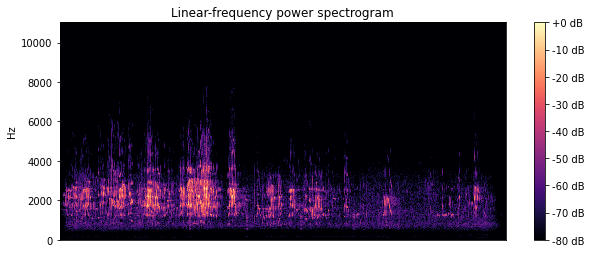

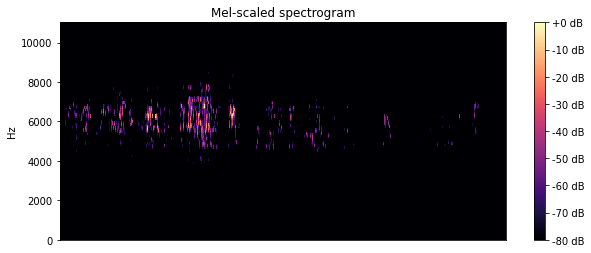

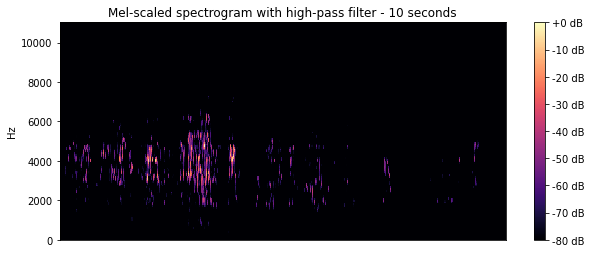

In [14]:

# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 0 

S = librosa.feature.melspectrogram(y=signal,sr=sample_rate,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sample_rate/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sample_rate,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sample_rate/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
plt.show()

# Creating Mel-Spectograms for CNN

In [3]:

os.chdir('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/AshyPrinia/')
os.getcwd()

'D:\\BirdImagesForCNN'

In [111]:
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 



for wav in os.listdir('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/'):
    if(wav.endswith('.json') or wav.endswith('.mp3')):
        print(wav)
        continue
    signal, sample_rate = librosa.load('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/' + str(wav) ,sr = None)
    print(wav)
    S = librosa.feature.melspectrogram(y=signal,sr=sample_rate,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sample_rate/2) 

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
    plt.axis('off')
#     plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off',
#                     labelright='off', labelbottom='off')
#     plt.legend('',frameon=False)
    plt.savefig('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/' + wav[:-4] + '.png',bbox_inches='tight',transparent=True, pad_inches=0)
    plt.clf()
    plt.close("all")
    gc.collect()
#     plt.show()
    

# Plot mel-spectrogram with high-pass filter




DNHalcyon107387.wav
DNHalcyon115903.wav
DNHalcyon117091.wav
DNHalcyon120919.wav
DNHalcyon125392.wav
DNHalcyon135397.wav
DNHalcyon145360.wav
DNHalcyon149784.wav
DNHalcyon155920.wav
DNHalcyon156896.wav
DNHalcyon157981.wav
DNHalcyon161223.wav
DNHalcyon162859.wav
DNHalcyon163894.wav
DNHalcyon169565.wav
DNHalcyon174978.wav
DNHalcyon181995.wav
DNHalcyon184706.wav
DNHalcyon187664.wav
DNHalcyon189123.wav
DNHalcyon189204.wav
DNHalcyon196949.wav
DNHalcyon197605.wav
DNHalcyon197737.wav
DNHalcyon19919.wav
DNHalcyon19988.wav
DNHalcyon200266.wav
DNHalcyon207665.wav
DNHalcyon208768.wav
DNHalcyon208814.wav
DNHalcyon209207.wav
DNHalcyon209212.wav
DNHalcyon209213.wav
DNHalcyon209214.wav
DNHalcyon209215.wav
DNHalcyon209538.wav
DNHalcyon210474.wav
DNHalcyon213367.wav
DNHalcyon244136.wav
DNHalcyon254982.wav
DNHalcyon278752.wav
DNHalcyon284525.wav
DNHalcyon284528.wav
DNHalcyon288093.wav
DNHalcyon289072.wav
DNHalcyon295725.wav
DNHalcyon297728.wav
DNHalcyon302460.wav
DNHalcyon303958.wav
DNHalcyon304181.wav
DN

Halcyon465506.mp3
Halcyon465506.wav
Halcyon468289.mp3
Halcyon468289.wav
Halcyon46909.mp3
Halcyon46909.wav
Halcyon469474.mp3
Halcyon469474.wav
Halcyon472751.mp3
Halcyon472751.wav
Halcyon472752.mp3
Halcyon472752.wav
Halcyon472753.mp3
Halcyon472753.wav
Halcyon477294.mp3
Halcyon477294.wav
Halcyon477297.mp3
Halcyon477297.wav
Halcyon477303.mp3
Halcyon477303.wav
Halcyon479600.mp3
Halcyon479600.wav
Halcyon481181.mp3
Halcyon481181.wav
Halcyon498802.mp3
Halcyon498802.wav
Halcyon498803.mp3
Halcyon498803.wav
Halcyon498804.mp3
Halcyon498804.wav
Halcyon498805.mp3
Halcyon498805.wav
Halcyon498806.mp3
Halcyon498806.wav
Halcyon498807.mp3
Halcyon498807.wav
Halcyon498808.mp3
Halcyon498808.wav
Halcyon498809.mp3
Halcyon498809.wav
Halcyon498810.mp3
Halcyon498810.wav
Halcyon498811.mp3
Halcyon498811.wav
Halcyon501340.mp3
Halcyon501340.wav
Halcyon507746.mp3
Halcyon507746.wav
Halcyon507751.mp3
Halcyon507751.wav
Halcyon507756.mp3
Halcyon507756.wav
Halcyon513453.mp3
Halcyon513453.wav
Halcyon514821.mp3
Halcyon51482

# Using Transfer Learning to train existing CNN vgg16 model

In [1]:
import pandas as pd
import numpy as np 
import itertools
import tensorflow
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dropout, Flatten, Dense  
from tensorflow.keras import applications  
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
tensorflow. __version__

'2.5.0-rc0'

In [13]:
!pip install np_utils

  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=b69097680328236d6cafa7d46f734681996270f459215079ea9033401a32ed0d
  Stored in directory: c:\users\91836\appdata\local\pip\cache\wheels\57\18\82\402fcaf521e84dfa67b077aea34d225fc32ce6085e2cb8dda6
Successfully built np-utils


In [128]:
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu
# !pip install tensorflow==2.5.0rc0
# !pip install keras==2.5.0rc0

In [2]:
#Default dimensions we found online
img_width, img_height = 558, 217  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = 'D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/train/'
validation_data_dir = 'D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/valid/'
test_data_dir = 'D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/test/'
   
# number of epochs to train top model  
epochs = 7 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50

In [3]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files

# Generating features with model

In [5]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 4590 images belonging to 10 classes.


c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:16:16.072668


In [6]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 2072 images belonging to 10 classes.
Time:  0:08:26.035396


In [7]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict_generator(  
     generator, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 98 images belonging to 10 classes.
Time:  0:00:25.010785


# Loading training, validation and testing data

In [87]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 4590 images belonging to 10 classes.


In [88]:

#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 2072 images belonging to 10 classes.


In [89]:
#testing data
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 98 images belonging to 10 classes.


# Training of model

In [90]:
#This is the best model we found. For additional models, check out I_notebook.ipynb
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100))
model.add(Activation('relu'))  
model.add(Dropout(0.3))  
model.add(Activation('relu'))   
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=750,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/750
92/92 [==============================] - 3s 27ms/step - loss: 2.3891 - acc: 0.1582 - val_loss: 2.0103 - val_acc: 0.3214
Epoch 2/750
92/92 [==============================] - 2s 24ms/step - loss: 2.0744 - acc: 0.2978 - val_loss: 1.8737 - val_acc: 0.4638
Epoch 3/750
92/92 [==============================] - 2s 24ms/step - loss: 1.9740 - acc: 0.3475 - val_loss: 1.8156 - val_acc: 0.4542
Epoch 4/750
92/92 [==============================] - 2s 24ms/step - loss: 1.9170 - acc: 0.3693 - val_loss: 1.7577 - val_acc: 0.4908
Epoch 5/750
92/92 [==============================] - 2s 23ms/step - loss: 1.8597 - acc: 0.3948 - val_loss: 1.6941 - val_acc: 0.5125
Epoch 6/750
92/92 [==============================] - 2s 25ms/step - loss: 1.8089 - acc: 0.4096 - val_loss: 1.6292 - val_acc: 0.5285
Epoch 7/750
92/92 [==============================] - 2s 24ms/step - loss: 1.7779 - acc: 0.4229 - val_loss: 1.5783 - val_acc: 0.5372
Epoch 8/750
92/92 [==============================] - 2s 25ms/step - loss: 1.

92/92 [==============================] - 3s 28ms/step - loss: 1.0339 - acc: 0.6960 - val_loss: 0.9782 - val_acc: 0.7070
Epoch 63/750
92/92 [==============================] - 3s 28ms/step - loss: 1.0482 - acc: 0.6764 - val_loss: 0.9807 - val_acc: 0.7148
Epoch 64/750
92/92 [==============================] - 3s 28ms/step - loss: 1.0174 - acc: 0.6941 - val_loss: 0.9872 - val_acc: 0.7143
Epoch 65/750
92/92 [==============================] - 3s 30ms/step - loss: 1.0126 - acc: 0.6975 - val_loss: 0.9697 - val_acc: 0.7167
Epoch 66/750
92/92 [==============================] - 3s 28ms/step - loss: 1.0113 - acc: 0.6914 - val_loss: 0.9566 - val_acc: 0.7177
Epoch 67/750
92/92 [==============================] - 3s 28ms/step - loss: 1.0330 - acc: 0.6857 - val_loss: 0.9536 - val_acc: 0.7172
Epoch 68/750
92/92 [==============================] - 3s 28ms/step - loss: 0.9681 - acc: 0.7023 - val_loss: 0.9545 - val_acc: 0.7273
Epoch 69/750
92/92 [==============================] - 3s 28ms/step - loss: 0.9781 

92/92 [==============================] - 3s 29ms/step - loss: 0.7438 - acc: 0.7921 - val_loss: 0.7582 - val_acc: 0.7867
Epoch 124/750
92/92 [==============================] - 2s 27ms/step - loss: 0.7431 - acc: 0.7915 - val_loss: 0.7501 - val_acc: 0.7881
Epoch 125/750
92/92 [==============================] - 2s 27ms/step - loss: 0.7395 - acc: 0.7856 - val_loss: 0.7456 - val_acc: 0.7862
Epoch 126/750
92/92 [==============================] - 3s 31ms/step - loss: 0.7232 - acc: 0.7988 - val_loss: 0.7433 - val_acc: 0.7881
Epoch 127/750
92/92 [==============================] - 3s 28ms/step - loss: 0.7179 - acc: 0.7974 - val_loss: 0.7431 - val_acc: 0.7891
Epoch 128/750
92/92 [==============================] - 3s 27ms/step - loss: 0.7411 - acc: 0.7867 - val_loss: 0.7327 - val_acc: 0.7896
Epoch 129/750
92/92 [==============================] - 2s 25ms/step - loss: 0.7113 - acc: 0.7977 - val_loss: 0.7312 - val_acc: 0.7939
Epoch 130/750
92/92 [==============================] - 2s 27ms/step - loss: 

92/92 [==============================] - 2s 26ms/step - loss: 0.5498 - acc: 0.8443 - val_loss: 0.6163 - val_acc: 0.8412
Epoch 185/750
92/92 [==============================] - 2s 25ms/step - loss: 0.5668 - acc: 0.8439 - val_loss: 0.6154 - val_acc: 0.8359
Epoch 186/750
92/92 [==============================] - 2s 26ms/step - loss: 0.5638 - acc: 0.8441 - val_loss: 0.6058 - val_acc: 0.8398
Epoch 187/750
92/92 [==============================] - 2s 26ms/step - loss: 0.5413 - acc: 0.8608 - val_loss: 0.6086 - val_acc: 0.8345
Epoch 188/750
92/92 [==============================] - 2s 25ms/step - loss: 0.5502 - acc: 0.8541 - val_loss: 0.6054 - val_acc: 0.8364
Epoch 189/750
92/92 [==============================] - 2s 25ms/step - loss: 0.5405 - acc: 0.8626 - val_loss: 0.6089 - val_acc: 0.8311
Epoch 190/750
92/92 [==============================] - 2s 25ms/step - loss: 0.5590 - acc: 0.8456 - val_loss: 0.6021 - val_acc: 0.8427
Epoch 191/750
92/92 [==============================] - 2s 25ms/step - loss: 

92/92 [==============================] - 2s 25ms/step - loss: 0.4319 - acc: 0.8917 - val_loss: 0.5328 - val_acc: 0.8620
Epoch 246/750
92/92 [==============================] - 2s 25ms/step - loss: 0.4365 - acc: 0.8912 - val_loss: 0.5271 - val_acc: 0.8600
Epoch 247/750
92/92 [==============================] - 2s 26ms/step - loss: 0.4307 - acc: 0.8843 - val_loss: 0.5251 - val_acc: 0.8596
Epoch 248/750
92/92 [==============================] - 2s 25ms/step - loss: 0.4483 - acc: 0.8866 - val_loss: 0.5225 - val_acc: 0.8591
Epoch 249/750
92/92 [==============================] - 2s 25ms/step - loss: 0.4141 - acc: 0.8997 - val_loss: 0.5160 - val_acc: 0.8591
Epoch 250/750
92/92 [==============================] - 2s 26ms/step - loss: 0.4426 - acc: 0.8825 - val_loss: 0.5295 - val_acc: 0.8615
Epoch 251/750
92/92 [==============================] - 2s 26ms/step - loss: 0.4258 - acc: 0.8878 - val_loss: 0.5202 - val_acc: 0.8557
Epoch 252/750
92/92 [==============================] - 2s 25ms/step - loss: 

92/92 [==============================] - 2s 26ms/step - loss: 0.3400 - acc: 0.9197 - val_loss: 0.4876 - val_acc: 0.8745
Epoch 307/750
92/92 [==============================] - 2s 26ms/step - loss: 0.3501 - acc: 0.9166 - val_loss: 0.4712 - val_acc: 0.8774
Epoch 308/750
92/92 [==============================] - 2s 27ms/step - loss: 0.3378 - acc: 0.9154 - val_loss: 0.4729 - val_acc: 0.8784
Epoch 309/750
92/92 [==============================] - 3s 28ms/step - loss: 0.3357 - acc: 0.9199 - val_loss: 0.4647 - val_acc: 0.8789
Epoch 310/750
92/92 [==============================] - 2s 25ms/step - loss: 0.3448 - acc: 0.9145 - val_loss: 0.4639 - val_acc: 0.8789
Epoch 311/750
92/92 [==============================] - 2s 26ms/step - loss: 0.3510 - acc: 0.9167 - val_loss: 0.4732 - val_acc: 0.8769
Epoch 312/750
92/92 [==============================] - 2s 27ms/step - loss: 0.3335 - acc: 0.9216 - val_loss: 0.4677 - val_acc: 0.8789
Epoch 313/750
92/92 [==============================] - 2s 26ms/step - loss: 

92/92 [==============================] - 2s 25ms/step - loss: 0.2943 - acc: 0.9251 - val_loss: 0.4439 - val_acc: 0.8880
Epoch 368/750
92/92 [==============================] - 2s 26ms/step - loss: 0.2902 - acc: 0.9276 - val_loss: 0.4445 - val_acc: 0.8890
Epoch 369/750
92/92 [==============================] - 2s 25ms/step - loss: 0.2748 - acc: 0.9339 - val_loss: 0.4381 - val_acc: 0.8890
Epoch 370/750
92/92 [==============================] - 2s 26ms/step - loss: 0.2619 - acc: 0.9435 - val_loss: 0.4425 - val_acc: 0.8890
Epoch 371/750
92/92 [==============================] - 2s 26ms/step - loss: 0.2635 - acc: 0.9423 - val_loss: 0.4394 - val_acc: 0.8866
Epoch 372/750
92/92 [==============================] - 2s 26ms/step - loss: 0.2809 - acc: 0.9361 - val_loss: 0.4381 - val_acc: 0.8885
Epoch 373/750
92/92 [==============================] - 2s 26ms/step - loss: 0.2895 - acc: 0.9285 - val_loss: 0.4455 - val_acc: 0.8885
Epoch 374/750
92/92 [==============================] - 2s 26ms/step - loss: 

92/92 [==============================] - 2s 25ms/step - loss: 0.2217 - acc: 0.9524 - val_loss: 0.4204 - val_acc: 0.8924
Epoch 429/750
92/92 [==============================] - 2s 25ms/step - loss: 0.2221 - acc: 0.9496 - val_loss: 0.4270 - val_acc: 0.8962
Epoch 430/750
92/92 [==============================] - 2s 25ms/step - loss: 0.2202 - acc: 0.9514 - val_loss: 0.4156 - val_acc: 0.8967
Epoch 431/750
92/92 [==============================] - 2s 25ms/step - loss: 0.2521 - acc: 0.9377 - val_loss: 0.4188 - val_acc: 0.8982
Epoch 432/750
92/92 [==============================] - 2s 25ms/step - loss: 0.2350 - acc: 0.9452 - val_loss: 0.4180 - val_acc: 0.8967
Epoch 433/750
92/92 [==============================] - 2s 25ms/step - loss: 0.2342 - acc: 0.9484 - val_loss: 0.4233 - val_acc: 0.8938
Epoch 434/750
92/92 [==============================] - 2s 26ms/step - loss: 0.2368 - acc: 0.9464 - val_loss: 0.4194 - val_acc: 0.8962
Epoch 435/750
92/92 [==============================] - 2s 25ms/step - loss: 

92/92 [==============================] - 2s 26ms/step - loss: 0.1963 - acc: 0.9507 - val_loss: 0.4113 - val_acc: 0.8996
Epoch 490/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1992 - acc: 0.9560 - val_loss: 0.4274 - val_acc: 0.8991
Epoch 491/750
92/92 [==============================] - 2s 26ms/step - loss: 0.1955 - acc: 0.9588 - val_loss: 0.4108 - val_acc: 0.9015
Epoch 492/750
92/92 [==============================] - 2s 26ms/step - loss: 0.1947 - acc: 0.9550 - val_loss: 0.4072 - val_acc: 0.9040
Epoch 493/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1935 - acc: 0.9548 - val_loss: 0.4139 - val_acc: 0.9011
Epoch 494/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1901 - acc: 0.9569 - val_loss: 0.4095 - val_acc: 0.9020
Epoch 495/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1905 - acc: 0.9569 - val_loss: 0.4337 - val_acc: 0.8972
Epoch 496/750
92/92 [==============================] - 2s 25ms/step - loss: 

92/92 [==============================] - 2s 26ms/step - loss: 0.1660 - acc: 0.9668 - val_loss: 0.4153 - val_acc: 0.9040
Epoch 551/750
92/92 [==============================] - 2s 26ms/step - loss: 0.1709 - acc: 0.9593 - val_loss: 0.4108 - val_acc: 0.9015
Epoch 552/750
92/92 [==============================] - 2s 26ms/step - loss: 0.1700 - acc: 0.9626 - val_loss: 0.4101 - val_acc: 0.9020
Epoch 553/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1715 - acc: 0.9597 - val_loss: 0.4140 - val_acc: 0.9040
Epoch 554/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1683 - acc: 0.9624 - val_loss: 0.4124 - val_acc: 0.9059
Epoch 555/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1631 - acc: 0.9657 - val_loss: 0.4097 - val_acc: 0.9040
Epoch 556/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1724 - acc: 0.9580 - val_loss: 0.4155 - val_acc: 0.9035
Epoch 557/750
92/92 [==============================] - 2s 25ms/step - loss: 

92/92 [==============================] - 2s 24ms/step - loss: 0.1397 - acc: 0.9710 - val_loss: 0.4153 - val_acc: 0.9054
Epoch 612/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1456 - acc: 0.9705 - val_loss: 0.4111 - val_acc: 0.9044
Epoch 613/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1498 - acc: 0.9684 - val_loss: 0.4220 - val_acc: 0.9044
Epoch 614/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1527 - acc: 0.9623 - val_loss: 0.4166 - val_acc: 0.9059
Epoch 615/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1520 - acc: 0.9668 - val_loss: 0.4206 - val_acc: 0.9069
Epoch 616/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1614 - acc: 0.9599 - val_loss: 0.4181 - val_acc: 0.9059
Epoch 617/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1425 - acc: 0.9674 - val_loss: 0.4268 - val_acc: 0.9044
Epoch 618/750
92/92 [==============================] - 2s 25ms/step - loss: 

92/92 [==============================] - 2s 25ms/step - loss: 0.1366 - acc: 0.9676 - val_loss: 0.4168 - val_acc: 0.9064
Epoch 673/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1328 - acc: 0.9691 - val_loss: 0.4244 - val_acc: 0.9025
Epoch 674/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1350 - acc: 0.9707 - val_loss: 0.4330 - val_acc: 0.9025
Epoch 675/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1376 - acc: 0.9674 - val_loss: 0.4189 - val_acc: 0.9054
Epoch 676/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1330 - acc: 0.9693 - val_loss: 0.4315 - val_acc: 0.9035
Epoch 677/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1447 - acc: 0.9657 - val_loss: 0.4206 - val_acc: 0.9054
Epoch 678/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1382 - acc: 0.9697 - val_loss: 0.4270 - val_acc: 0.9054
Epoch 679/750
92/92 [==============================] - 2s 26ms/step - loss: 

92/92 [==============================] - 2s 25ms/step - loss: 0.1171 - acc: 0.9743 - val_loss: 0.4363 - val_acc: 0.9069
Epoch 734/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1358 - acc: 0.9637 - val_loss: 0.4264 - val_acc: 0.9078
Epoch 735/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1178 - acc: 0.9711 - val_loss: 0.4370 - val_acc: 0.9054
Epoch 736/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1265 - acc: 0.9719 - val_loss: 0.4296 - val_acc: 0.9054
Epoch 737/750
92/92 [==============================] - 2s 24ms/step - loss: 0.1311 - acc: 0.9712 - val_loss: 0.4282 - val_acc: 0.9059
Epoch 738/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1294 - acc: 0.9684 - val_loss: 0.4455 - val_acc: 0.9044
Epoch 739/750
92/92 [==============================] - 2s 25ms/step - loss: 0.1275 - acc: 0.9709 - val_loss: 0.4331 - val_acc: 0.9069
Epoch 740/750
92/92 [==============================] - 2s 25ms/step - loss: 

In [91]:
#Model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 52224)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               5222500   
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

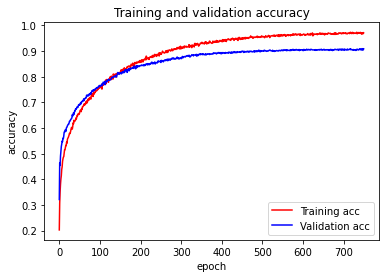

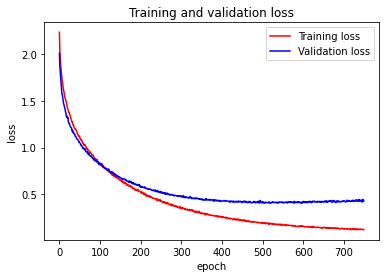

In [92]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [94]:
model.evaluate(  
 test_data, test_labels, batch_size=batch_size, verbose=1)

2/2 [==============================] - 0s 7ms/step - loss: 0.4812 - acc: 0.8980


[0.4811503291130066, 0.8979591727256775]

In [95]:
test_data.shape

(98, 17, 6, 512)

(1, 17, 6, 512)

In [96]:
model.predict(np.expand_dims(test_data[0], axis=0))

array([[9.90401804e-01, 2.76260380e-07, 2.88278447e-04, 1.13043796e-04,
        6.69145607e-04, 8.51598270e-06, 4.04799939e-04, 8.10412597e-03,
        4.84833549e-07, 9.50046433e-06]], dtype=float32)

In [97]:
predictions = np.round(model.predict(test_data),0)

In [98]:
birds = [ bird_name for bird_name in os.listdir(train_data_dir)]
classification_metrics = metrics.classification_report(test_labels, predictions, target_names=birds)
print(classification_metrics)

                          precision    recall  f1-score   support

              AshyPrinia       1.00      0.70      0.82        10
               AsianKoel       0.91      1.00      0.95        10
             BlackDrongo       1.00      0.90      0.95        10
              CommonMyna       1.00      0.80      0.89        10
        CommonTailorbird       0.69      0.90      0.78        10
           GreaterCoucal       0.91      1.00      0.95        10
          GreenBee-eater       1.00      0.70      0.82        10
             IndianRobin       1.00      1.00      1.00         8
            LaughingDove       1.00      0.90      0.95        10
White-throatedKingfisher       0.91      1.00      0.95        10

               micro avg       0.93      0.89      0.91        98
               macro avg       0.94      0.89      0.91        98
            weighted avg       0.94      0.89      0.91        98
             samples avg       0.89      0.89      0.89        98



c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save the trained model

In [99]:
model.save('D:/C Drive Documents/Bird_Sound_Recognition/My_Model')

INFO:tensorflow:Assets written to: D:/C Drive Documents/Bird_Sound_Recognition/My_Model\assets


INFO:tensorflow:Assets written to: D:/C Drive Documents/Bird_Sound_Recognition/My_Model\assets


# Load saved model

In [100]:
reconstructed_model = keras.models.load_model('D:/C Drive Documents/Bird_Sound_Recognition/My_Model')

In [101]:
reconstructed_model.evaluate(  
 test_data, test_labels, batch_size=batch_size, verbose=1)

2/2 [==============================] - 8s 7ms/step - loss: 0.4812 - acc: 0.8980


[0.4811503291130066, 0.8979591727256775]

In [106]:
[ bird_name for bird_name in os.listdir(train_data_dir)]

['AshyPrinia',
 'AsianKoel',
 'BlackDrongo',
 'CommonMyna',
 'CommonTailorbird',
 'GreaterCoucal',
 'GreenBee-eater',
 'IndianRobin',
 'LaughingDove',
 'White-throatedKingfisher']

# Testing on new images

In [102]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(558, 217))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [103]:
def test_single_image(path):
    birds = [ bird_name for bird_name in os.listdir(train_data_dir)]
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images)  
    preds = model.predict_proba(bt_prediction)
    for idx, bird, x in zip(range(0,10), birds , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, bird, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = generator_top.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [104]:
def predict_bird_sound(source_path,file_name, target_path):
    N_FFT = 1024         
    HOP_SIZE = 1024       
    N_MELS = 128            
    WIN_SIZE = 1024      
    WINDOW_TYPE = 'hann' 
    FEATURE = 'mel'      
    FMIN = 1400
    augmentation = ''

    signal, sample_rate = librosa.load(source_path +  file_name,sr = None)
    DNsignal = removeSilence(signal)
    mel_spectogram_generator(file_name,DNsignal,sample_rate,'',target_path)
    path =  target_path  + augmentation + file_name[:-4] + '.png'
    test_single_image(path)

In [105]:
predict_bird_sound('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/GreenBee-eater/','Merops621031.wav','D:/')

[INFO] loading and preprocessing image...


c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


ID: 0, Label: AshyPrinia 0.11%
ID: 1, Label: AsianKoel 0.3%
ID: 2, Label: BlackDrongo 0.22%
ID: 3, Label: CommonMyna 0.02%
ID: 4, Label: CommonTailorbird 2.31%
ID: 5, Label: GreaterCoucal 0.22%
ID: 6, Label: GreenBee-eater 96.79%
ID: 7, Label: IndianRobin 0.01%
ID: 8, Label: LaughingDove 0.02%
ID: 9, Label: White-throatedKingfisher 0.0%
Final Decision:
.
..
...
ID: 6, Label: GreenBee-eater


c:\users\91836\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Data Augmentation

In [47]:
!pip install nlpaug

In [54]:
import nlpaug
import nlpaug.augmenter.audio as naa
import librosa
import librosa.display as librosa_display
import matplotlib.pyplot as plt

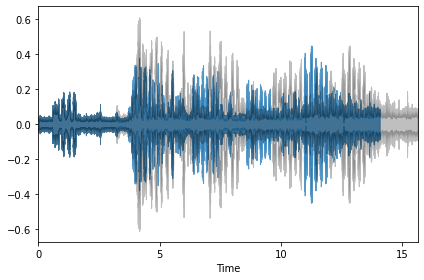

In [75]:
signal, sample_rate = librosa.load('D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/AshyPrinia/' + 'DNPrinia570426.wav',sr = None)

# librosa_display.waveplot(naa.CropAug(sampling_rate=sample_rate).augment(signal), sr=sample_rate, alpha=0.75)
# librosa_display.waveplot(naa.MaskAug(sampling_rate=sample_rate, mask_with_noise=False).augment(signal), sr=sample_rate, alpha=0.75)
# librosa_display.waveplot(naa.SpeedAug().augment(signal), sr=sample_rate, alpha=0.75)


# librosa_display.waveplot(naa.LoudnessAug().augment(signal), sr=sample_rate, alpha=0.75)
# librosa_display.waveplot(naa.NoiseAug().augment(signal), sr=sample_rate, alpha=0.75)
# librosa_display.waveplot(naa.ShiftAug(sampling_rate=sample_rate).augment(signal), sr=sample_rate, alpha=0.75)

librosa_display.waveplot(signal, sr=sample_rate, color='black', alpha=0.25)

plt.tight_layout()
plt.show()

In [50]:
def mel_spectogram_generator(audio_name,signal,sample_rate,augmentation,target_path):
    S = librosa.feature.melspectrogram(y=signal,sr=sample_rate,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sample_rate/2) 

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
    plt.axis('off')
    plt.savefig(target_path + augmentation + audio_name[:-4] + '.png',bbox_inches='tight',transparent=True, pad_inches=0)
    plt.clf()
    plt.close("all")
    gc.collect()
    

In [98]:
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

folder_path = 'D:/C Drive Documents/Bird_Sound_Recognition/Data for each bird/data/xeno-canto-dataset/White-throatedKingfisher/'

for wav in os.listdir(folder_path):
    if(wav.endswith('.json') or wav.endswith('.mp3') or ('DN' not in wav) or wav.endswith('.png')):
        print(wav)
        continue
    signal, sample_rate = librosa.load(folder_path + str(wav) ,sr = None)
    mel_spectogram_generator(wav,naa.LoudnessAug().augment(signal),sample_rate,'Loud',folder_path)
    print('Loud' + wav)
    mel_spectogram_generator(wav,naa.NoiseAug().augment(signal),sample_rate,'Noise',folder_path)
    print('Noise' + wav)
    mel_spectogram_generator(wav,naa.ShiftAug(sampling_rate=sample_rate).augment(signal),sample_rate,'Shift',folder_path)
    print('Shift' + wav)
    





DNHalcyon107387.png
LoudDNHalcyon107387.wav
NoiseDNHalcyon107387.wav
ShiftDNHalcyon107387.wav
DNHalcyon115903.png
LoudDNHalcyon115903.wav
NoiseDNHalcyon115903.wav
ShiftDNHalcyon115903.wav
DNHalcyon117091.png
LoudDNHalcyon117091.wav
NoiseDNHalcyon117091.wav
ShiftDNHalcyon117091.wav
DNHalcyon120919.png
LoudDNHalcyon120919.wav
NoiseDNHalcyon120919.wav
ShiftDNHalcyon120919.wav
DNHalcyon125392.png
LoudDNHalcyon125392.wav
NoiseDNHalcyon125392.wav
ShiftDNHalcyon125392.wav
DNHalcyon135397.png
LoudDNHalcyon135397.wav
NoiseDNHalcyon135397.wav
ShiftDNHalcyon135397.wav
DNHalcyon145360.png
LoudDNHalcyon145360.wav
NoiseDNHalcyon145360.wav
ShiftDNHalcyon145360.wav
DNHalcyon149784.png
LoudDNHalcyon149784.wav
NoiseDNHalcyon149784.wav
ShiftDNHalcyon149784.wav
DNHalcyon155920.png
LoudDNHalcyon155920.wav
NoiseDNHalcyon155920.wav
ShiftDNHalcyon155920.wav
DNHalcyon156896.png
LoudDNHalcyon156896.wav
NoiseDNHalcyon156896.wav
ShiftDNHalcyon156896.wav
DNHalcyon157981.png
LoudDNHalcyon157981.wav
NoiseDNHalcyon15

NoiseDNHalcyon403162.wav
ShiftDNHalcyon403162.wav
DNHalcyon404882.png
LoudDNHalcyon404882.wav
NoiseDNHalcyon404882.wav
ShiftDNHalcyon404882.wav
DNHalcyon405349.png
LoudDNHalcyon405349.wav
NoiseDNHalcyon405349.wav
ShiftDNHalcyon405349.wav
DNHalcyon428889.png
LoudDNHalcyon428889.wav
NoiseDNHalcyon428889.wav
ShiftDNHalcyon428889.wav
DNHalcyon430256.png
LoudDNHalcyon430256.wav
NoiseDNHalcyon430256.wav
ShiftDNHalcyon430256.wav
DNHalcyon430263.png
LoudDNHalcyon430263.wav
NoiseDNHalcyon430263.wav
ShiftDNHalcyon430263.wav
DNHalcyon430267.png
LoudDNHalcyon430267.wav
NoiseDNHalcyon430267.wav
ShiftDNHalcyon430267.wav
DNHalcyon431502.png
LoudDNHalcyon431502.wav
NoiseDNHalcyon431502.wav
ShiftDNHalcyon431502.wav
DNHalcyon431504.png
LoudDNHalcyon431504.wav
NoiseDNHalcyon431504.wav
ShiftDNHalcyon431504.wav
DNHalcyon433760.png
LoudDNHalcyon433760.wav
NoiseDNHalcyon433760.wav
ShiftDNHalcyon433760.wav
DNHalcyon436748.png
LoudDNHalcyon436748.wav
NoiseDNHalcyon436748.wav
ShiftDNHalcyon436748.wav
DNHalcyon4

LoudDNHalcyon614710.wav
NoiseDNHalcyon614710.wav
ShiftDNHalcyon614710.wav
DNHalcyon614888.png
LoudDNHalcyon614888.wav
NoiseDNHalcyon614888.wav
ShiftDNHalcyon614888.wav
DNHalcyon614890.png
LoudDNHalcyon614890.wav
NoiseDNHalcyon614890.wav
ShiftDNHalcyon614890.wav
DNHalcyon614891.png
LoudDNHalcyon614891.wav
NoiseDNHalcyon614891.wav
ShiftDNHalcyon614891.wav
DNHalcyon614894.png
LoudDNHalcyon614894.wav
NoiseDNHalcyon614894.wav
ShiftDNHalcyon614894.wav
DNHalcyon614896.png
LoudDNHalcyon614896.wav
NoiseDNHalcyon614896.wav
ShiftDNHalcyon614896.wav
DNHalcyon615043.png
LoudDNHalcyon615043.wav
NoiseDNHalcyon615043.wav
ShiftDNHalcyon615043.wav
DNHalcyon615044.png
LoudDNHalcyon615044.wav
NoiseDNHalcyon615044.wav
ShiftDNHalcyon615044.wav
DNHalcyon615430.png
LoudDNHalcyon615430.wav
NoiseDNHalcyon615430.wav
ShiftDNHalcyon615430.wav
DNHalcyon615560.png
LoudDNHalcyon615560.wav
NoiseDNHalcyon615560.wav
ShiftDNHalcyon615560.wav
DNHalcyon615586.png
LoudDNHalcyon615586.wav
NoiseDNHalcyon615586.wav
ShiftDNHalc

In [82]:
if 'DN' not in 'Prinia12131313.wav':
    print('continue')

continue
